In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits, make_blobs, make_circles
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Testing linear Kernel

In [2]:
digit= load_digits()

In [3]:
digit_X= digit.data

In [4]:
digit_y= digit.target

In [5]:
digit_X[45]

array([ 0.,  0.,  9., 16., 13.,  6.,  0.,  0.,  0.,  0.,  6.,  5., 16.,
       16.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  5.,  0.,  0.,  0.,  0.,
        0.,  5., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  2.,
        0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  4.,  8.,
       11., 15., 12.,  0.,  0.,  0., 11., 14., 12.,  8.,  0.,  0.])

In [6]:
digit_y[45]

np.int64(3)

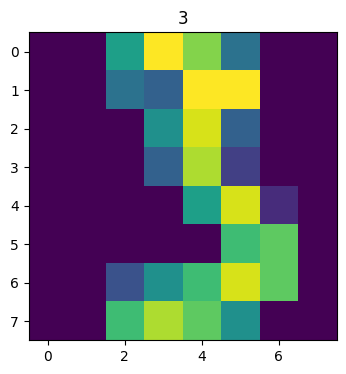

In [7]:
plt.figure(figsize=(4,4))
plt.imshow(digit_X[45].reshape(8,8))
plt.title(digit_y[45])
plt.show()

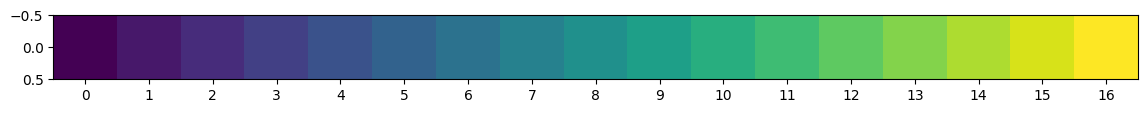

In [8]:
plt.figure(figsize=(14,4))
plt.imshow(np.arange(0,17).reshape(1,-1))
plt.xticks(range(17))
plt.show()

In [12]:
X_train1, X_test1, y_train1, y_test1= train_test_split(digit_X, digit_y, test_size=0.3, random_state=34)

In [13]:
lin_model= SVC(kernel="linear")

In [20]:
def model_builder(model, train_in, test_in, train_out, test_out):
    model.fit(train_in, train_out)
    train_score= np.round(model.score(train_in, train_out)*100,2)
    pred= model.predict(test_in)
    test_score= np.round(accuracy_score(test_out, pred)*100, 2)
    return f"Training Score: {train_score}%-----Testing Score: {test_score}%"

In [21]:
model_builder(lin_model, X_train1, X_test1, y_train1, y_test1)

'Training Score: 100.0%-----Testing Score: 98.33%'

## Testing Polynomial Kernel

In [25]:
circle_X, circle_y=  make_circles(n_samples=400, factor=0.5, noise=0.08, random_state=70)

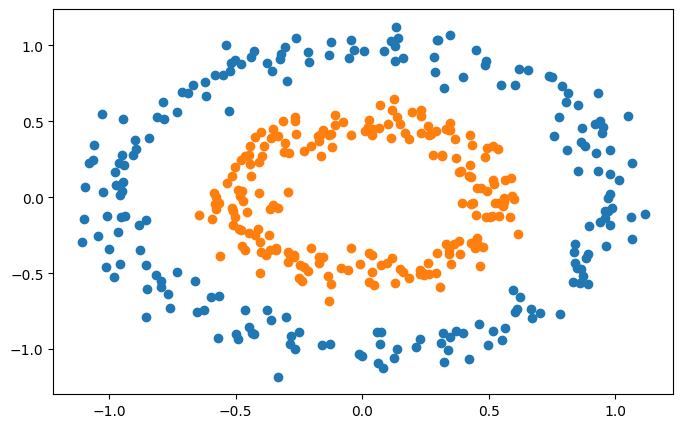

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(circle_X[circle_y==0, 0], circle_X[circle_y==0,1])
plt.scatter(circle_X[circle_y==1, 0], circle_X[circle_y==1,1])
plt.show()

In [27]:
X_train2, X_test2, y_train2, y_test2= train_test_split(circle_X, circle_y, train_size=0.7, random_state=23)

In [30]:
# Linear Kernel with default parameters
model_builder(SVC(kernel="linear"), X_train2, X_test2, y_train2, y_test2)

'Training Score: 35.71%-----Testing Score: 37.5%'

In [31]:
lin_model2= SVC(kernel="linear")
model_builder(lin_model2, X_train2, X_test2, y_train2, y_test2)

'Training Score: 35.71%-----Testing Score: 37.5%'

In [33]:
# Linear Kernel with c=0.5
lin_model3= SVC(kernel="linear", C=0.5)
model_builder(lin_model3, X_train2, X_test2, y_train2, y_test2)

'Training Score: 50.71%-----Testing Score: 48.33%'

In [34]:
# Linear Kernel with c=2
lin_model4= SVC(kernel="linear", C=2)
model_builder(lin_model4, X_train2, X_test2, y_train2, y_test2)

'Training Score: 54.29%-----Testing Score: 50.0%'

In [35]:
# Polynomail Kernel with default parameters
poly_model= SVC(kernel="poly")
model_builder(poly_model, X_train2, X_test2, y_train2, y_test2)

'Training Score: 50.71%-----Testing Score: 48.33%'

In [40]:
# Polynomail Kernel with c=0.5
poly_model2= SVC(kernel="poly", C=0.5, degree=2)
model_builder(poly_model2, X_train2, X_test2, y_train2, y_test2)

'Training Score: 100.0%-----Testing Score: 100.0%'

## Testing RBF Kernel (Gaussian Kernel)

In [43]:
blob_X, blob_y= make_blobs(n_samples=500, centers=[[0.1, 0.1], [0.8, 0.8]], random_state=43)

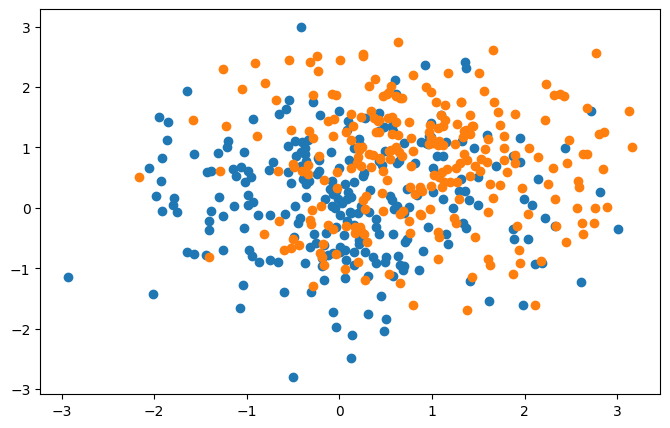

In [44]:
plt.figure(figsize=(8,5))
plt.scatter(blob_X[blob_y==0, 0], blob_X[blob_y==0,1])
plt.scatter(blob_X[blob_y==1, 0], blob_X[blob_y==1,1])
plt.show()

In [45]:
X_train3, X_test3, y_train3, y_test3= train_test_split(blob_X, blob_y, train_size=0.7, random_state=234)

In [46]:
# Linear Kernel with default parameters
lin_model5= SVC(kernel="linear")
model_builder(lin_model5, X_train3, X_test3, y_train3, y_test3)

'Training Score: 70.0%-----Testing Score: 72.67%'

In [47]:
# Linear Kernel with c=0.5
lin_model6= SVC(kernel="linear", C=0.5)
model_builder(lin_model6, X_train3, X_test3, y_train3, y_test3)

'Training Score: 70.0%-----Testing Score: 72.67%'

In [48]:
# Polynomail Kernel with default parameters
poly_model3= SVC(kernel="poly")
model_builder(poly_model3, X_train3, X_test3, y_train3, y_test3)

'Training Score: 64.0%-----Testing Score: 72.0%'

In [50]:
# Polynomail Kernel with c=0.5
poly_model4= SVC(kernel="poly", C=0.5, degree=3)
model_builder(poly_model4, X_train3, X_test3, y_train3, y_test3)

'Training Score: 64.57%-----Testing Score: 72.0%'

In [51]:
# RBF Kernel with default parameters
rbf_model= SVC()
model_builder(rbf_model, X_train3, X_test3, y_train3, y_test3)

'Training Score: 69.43%-----Testing Score: 71.33%'

In [52]:
# RBF Kernel with C=0.5, gamma="auto"
rbf_model2= SVC(C=0.5, gamma="auto")
model_builder(rbf_model2, X_train3, X_test3, y_train3, y_test3)

'Training Score: 70.0%-----Testing Score: 71.33%'

In [54]:
# RBF Kernel with C=0.5, gamma="auto"
rbf_model3= SVC(C=2, gamma="auto")
model_builder(rbf_model3, X_train3, X_test3, y_train3, y_test3)

'Training Score: 68.57%-----Testing Score: 71.33%'

# Using GridSearchCV to find best Model

In [56]:
params={
    "C": [0.01, 0.5, 1.0, 8, 20],
    "kernel": ['rbf', 'poly', 'linear'],
    "degree": [1, 2, 3,4, 5, 10],
    "gamma": ['auto', 'scale', 0.1, 0.5, 1.0, 5, 10],
    "coef0": [0.0, 0.5, 0.1, 1.0]
}


In [57]:
gscv= GridSearchCV(estimator=SVC(), param_grid=params, verbose=True, n_jobs=-1, cv=5, scoring="accuracy")

In [58]:
gscv.fit(X_train3, y_train3)

Fitting 5 folds for each of 2520 candidates, totalling 12600 fits


KeyboardInterrupt: 